In [1]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('ds_salaries.csv', index_col='db_id')
df = data.loc[:, ['company_location', 'job_title', 'experience_level', 'salary_in_usd']]
X = df.drop('salary_in_usd', axis='columns')
y = df.salary_in_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['company_location', 'job_title', 'experience_level']),
    remainder='passthrough'
)
clf = DecisionTreeRegressor( random_state=42)
pipe = make_pipeline(column_trans, clf)
pipe.fit(X_train, y_train)
importances = clf.feature_importances_

In [2]:
import pandas as pd
data = pd.read_csv('ds_salaries.csv', index_col='db_id')
data.shape

(607, 11)

In [26]:
from sklearn.cluster import DBSCAN
import sklearn.utils
data_temp = data[['company_location', 'job_title']]
db = DBSCAN(eps=0.3, min_samples=10)
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['company_location', 'job_title']),
    remainder='passthrough'
)
db = DBSCAN(eps=0.3, min_samples=10)
pipe = make_pipeline(column_trans, db)
pipe.fit(data_temp)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
data.loc[:, 'clusters'] = labels

In [27]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [54]:
data[:10]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,clusters
db_id,,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,-1
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,-1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,-1
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,-1
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,0
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,1
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,-1
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,-1
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,-1


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data_temp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data_temp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

ValueError: x and y must be the same size

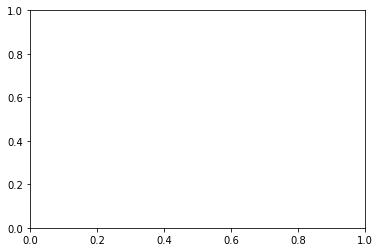

In [48]:
import matplotlib.pyplot as plt
data1 = data.loc[data['clusters'] == 1]
y = data['salary_in_usd']
plt.scatter(data1, y, color = 'red')
plt.show()

In [51]:
y.shape

(607,)

In [53]:
data.loc[data['clusters'] == 1].

db_id
5      1
14     1
51     1
79     1
89     1
      ..
588    1
589    1
597    1
604    1
605    1
Name: clusters, Length: 71, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
 11  clusters            607 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 61.6+ KB
